In [156]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import linalg as lin
import imageio

**1a)** Dado um sistema linear `Ax=b`, o objetivo da Eliminação de Gauss é obter um sistema linear triangular superior equivalente a `Ax=b`. Para atingir este objetivo, utiliza-se a matriz aumentada `[A | b]` e através de operações elementares (que preservam o determinante), obtem-se a matriz equivalente `[A' | b']`. ou seja, com mesma solução `x`.  
O processo para a Eliminação de Gauss é:

1. Cria-se a matriz aumentada `[A | b]`
2. Para cada coluna, faça:
  1. Selecione o elemento da diagonal como pivô
  2. Anule todos os elementos abaixo do pivô com a fórmula: `Para k=1, ..., n-1 com n sendo a ordem do sistema linear, temos que Li(k+1) <- Li(k) + mik Lk(k), i = k+1, ..., n` com `mik = -aik(k)/akk(k)`.

Após a realização do processo, teremos `[A' | b']` com `A'` matriz triangular superior.  

Caso fosse realizado uma Decomposição LU na matriz original `A`, a matriz `A'` seria igual a matriz `U`. A matriz `L` da Decomposição LU está por atrás do processo:  
No passo 1, ou seja, `a11` como pivô, o que estamos fazendo é multiplicar a matriz `A` por uma matriz `M1` e essa matriz M1 é uma matriz com diagonal 1 dada por:
```
M1 = [
  [1                ],         [1               ],         [1              ],
  [     1           ],   ...   [m21   1         ],    =    [m21   1        ],
  [        ...      ],         [       ...      ],         [      ...      ],
  [mn1             1]          [              1 ]          [mn1           1]
]
```
Analogamente para o restante do processo. Ou seja, no final, temos:
`Ux = Mn-1...M2M1b`. Se fazemos `M = Mn-1...M2M1b`, temos que `Ux = Mb`. 
```
Ux = Mb  
M^(-1)Ux = M^(-1)Mb
M^(-1)Ux = b
lOGO, L = M^(-1).
```
Ou seja,
```
L = M^(-1) = M1(-1)M2^(-1)...Mn-1^(-1)
L = [  
    [1      0    0    ... 0],  
    [-m21   1    0    ... 0],
    [-m31  -m32  1    ... 0],
    [         ...          ],
    [-mn1  -mn2  -mn3 ... 1]  
]
```

Portanto a Eliminação de Gauss e Decomposição LU são equivalentes.



**1b)** Temos que:  
$
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
 -2&  2&  -3&  0\\ 
 -2&  0&  -1& -3\\ 
 -2&  0&   0& -2
\end{bmatrix} \\
m_{21} = -(-2/-1) = -2 \\
L_{2} = L_{2}+m_{21}*L1 = L_{2} = L_{2}-2*L1\\
L_{2} = (-2, 2, -3, 0)-2(-1, 2, -2, 1) = (0, -2, 1, -2) \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
 -2&  0&  -1& -3\\ 
 -2&  0&   0& -2
\end{bmatrix} \\
m_{31} = -(-2/-1) = -2 \\
L_{3} = L_{3}+m_{31}*L1 \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  -4&  3& -5\\ 
 -2&  0&   0& -2
\end{bmatrix} \\
m_{41} = -(-2/-1) = -2 \\
L_{4} = L_{4}+m_{41}*L1 \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  -4&  3& -5\\ 
  0&  -4&  4& -4
\end{bmatrix} \\
m_{32} = -(-4/-2) = -2 \\
L_{3} = L_{3}+m_{32}*L1 \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  0&  1& -1\\ 
  0&  -4&  4& -4
\end{bmatrix} \\
m_{42} = -(-4/-2) = -2 \\
L_{4} = L_{4}+m_{42}*L1 \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  0&  1& -1\\ 
  0&  0&  2& 0
\end{bmatrix} \\
m_{43} = -(2/1) = -2 \\
L_{4} = L_{4}+m_{43}*L1 \\
\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  0&  1& -1\\ 
  0&  0&  0& 2
\end{bmatrix} \\
$


Logo, temos que:  
M1 = $\begin{bmatrix}
 1&  0&  0&  0\\ 
  -2&  1&  0&  0\\ 
  -2&  0&  1& 0\\ 
  -2&  0&  0& 1
\end{bmatrix}$  
M2 = $\begin{bmatrix}
 1&  0&  0&  0\\ 
 0&  1&  0&  0\\ 
 0&  -2&  1& 0\\ 
 0&  -2&  0& 1
\end{bmatrix}$  
M3 = $\begin{bmatrix}
 1&  0&  0&  0\\ 
 0&  1&  0&  0\\ 
 0&  0&  1& 0\\ 
 0&  0&  -2& 1
\end{bmatrix}$ 

E, temos que:  
M1(^-1) = $\begin{bmatrix}
 1&  0&  0&  0\\ 
  2&  1&  0&  0\\ 
  2&  0&  1& 0\\ 
  2&  0&  0& 1
\end{bmatrix}$  
M2(^-1) = $\begin{bmatrix}
 1&  0&  0&  0\\ 
 0&  1&  0&  0\\ 
 0&  2&  1& 0\\ 
 0&  2&  0& 1
\end{bmatrix}$  
M3(^-1) = $\begin{bmatrix}
 1&  0&  0&  0\\ 
 0&  1&  0&  0\\ 
 0&  0&  1& 0\\ 
 0&  0&  2& 1
\end{bmatrix}$

Portanto,
U = A' = $\begin{bmatrix}
 -1&  2&  -2&  1\\ 
  0&  -2&  1&  -2\\ 
  0&  0&  1& -1\\ 
  0&  0&  0& 2
\end{bmatrix}$
e L = $\begin{bmatrix}
 1&  0&  0& 0\\ 
 2&  1&  0& 0\\ 
 2&  2&  1& 0\\ 
 2&  2&  2& 1
\end{bmatrix}$

In [38]:
# 1c)

# Decomposição LU
def decomposicaoLU(A):
     n = np.shape(A)[0]
     L = np.eye(n) 
     U = np.zeros((n,n))
     for k  in np.arange(n):
        for j in np.arange(k,n):
           U[k,j]=A[k,j]
           for s in np.arange(k):
               U[k,j] = U[k,j] - L[k,s]*U[s,j]
        for i in np.arange(k+1,n):
           L[i,k]=A[i,k]
           for s in np.arange(k):
               L[i,k] = L[i,k] - L[i,s]*U[s,k]
           L[i,k] = L[i,k]/U[k,k]
     return L, U   

def inversa(A):
  n = np.shape(A)[0]  
  B = np.zeros(A.shape)
  L, U = decomposicaoLU(A)
  # Para cada coluna de A
  for i in range(A.shape[1]):
    # Criando o vetor da base canonica
    e = np.zeros(A.shape[0])
    e[i] = 1
    # Substituição progressiva
    for k in range(1,n):
      e[k] = e[k] - L[k,0:k].dot(e[0:k]) 
    # Substituição regressiva
    for k in range(n-1,-1,-1):
      e[k] = (e[k] - U[k,k+1:n].dot(e[k+1:n]))/U[k,k] 
      # Armazenando o valor calculado na matriz final
      B[k][i] = e[k] 
  return B

A = np.array([[-1, 2, -2, 1],
              [-2, 2, -3, 0],
              [-2, 0, -1, -3],
              [-2, 0, 0, -2]])

B = inversa(A)
print("Matriz A:")
print(A)
print("Matriz inversa de A:")
print(B)

Matriz A:
[[-1  2 -2  1]
 [-2  2 -3  0]
 [-2  0 -1 -3]
 [-2  0  0 -2]]
Matriz inversa de A:
[[ 1.   -1.    1.   -1.  ]
 [ 2.5  -2.    1.   -0.25]
 [ 1.   -1.    0.    0.5 ]
 [-1.    1.   -1.    0.5 ]]


In [78]:
# 2a)

A = np.array([[4, -2, 1, 0, 0, 0],
            [-2, 7, -2, 1, 0, 0],
            [1, -2, 7, -2, 1, 0],
            [0, 1, -2, 7, -2, 1],
            [0, 0, 1, -2, 7, -2],
            [0, 0, 0, 1, -2, 4]])
b = np.array([-1, -2, 1, 1, -2, -1])

# Gauss-Jacobi
n = np.shape(A)[0];
D = np.diag(np.diag(A)); # D é matriz diagonal formada pela diagonal de A
aux_C = np.linalg.solve(D,A);
C = np.eye(n) - aux_C;
g = np.linalg.solve(D,b);

print("Matriz C do Gauss-Jacobi:")
print(C)
print("Vetor g do Gauss-Jacobi:")
print(g)

# Gauss-Seidel
L = np.tril(A); 
R = np.triu(A,1);
C = -np.linalg.solve(L,R);
g = np.linalg.solve(L,b);

print("")

print("Matriz C do Gauss-Seidel:")
print(C)
print("Vetor g do Gauss-Seidel:")
print(g)

Matriz C do Gauss-Jacobi:
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]
Vetor g do Gauss-Jacobi:
[-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]

Matriz C do Gauss-Seidel:
[[-0.          0.5        -0.25       -0.         -0.         -0.        ]
 [-0.          0.14285714  0.21428571 -0.14285714 -0.         -0.        ]
 [-0.         -0.03061224  0.09693878  0.24489796 -0.14285714 -0.        ]
 [-0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [-0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [-0.          0.00531

In [136]:
# 2b)

A = np.array([[4, -2, 1, 0, 0, 0],
            [-2, 7, -2, 1, 0, 0],
            [1, -2, 7, -2, 1, 0],
            [0, 1, -2, 7, -2, 1],
            [0, 0, 1, -2, 7, -2],
            [0, 0, 0, 1, -2, 4]])

def criterioDasColunas(A):
  alfa = np.zeros(A.shape[1])
  for i in range(A.shape[1]):
      alfa[i] = (np.sum(np.abs(A[:, i])) - np.abs(A[i, i])) / np.abs(A[i, i])
  return alfa, np.max(alfa)

def criterioDasLinhas(A):
  alfa = np.zeros(A.shape[1])
  for i in range(A.shape[1]):
      alfa[i] = (np.sum(np.abs(A[i, :])) - np.abs(A[i, i])) / np.abs(A[i, i])
  return alfa, np.max(alfa)

alfa1 = criterioDasColunas(A)[1]
alfa2 = criterioDasLinhas(A)[1]
print("Criterio das Colunas", alfa1)
print("Criterio das Linhas:", alfa2)
print("Como o maior alfa obtido no critério das colunas e/ou das linhas é menor que 1, o método de Gauss-Jacobi converge para A")

print("")

def criterioDeSassenfeld(A):
  beta = np.zeros(A.shape[0])
  D = np.diagflat(np.diag(A))
  D_inv = np.linalg.inv(D)
  C = np.eye(A.shape[0]) - (np.dot(D_inv, A))
  beta[0] = np.sum(np.abs(C[0, 1:]))
  for i in range(1, A.shape[0]):
      beta[i] = np.sum(beta[: (i - 1)] * np.abs(C[i, : (i - 1)])) + np.sum(np.abs(C[i:(i + 1)]))
  return beta, np.max(beta)

beta = criterioDeSassenfeld(A)[1]
print("Criterio de Sassenfeld: ", beta)
print("Como o maior beta obtido com o criterio de Sassenfeld é menor que 1, o método de Gauss-Seidel converge para A")

Criterio das Colunas 0.8571428571428571
Criterio das Linhas: 0.8571428571428571
Como o maior alfa obtido no critério das colunas e/ou das linhas é menor que 1, o método de Gauss-Jacobi converge para A

Criterio de Sassenfeld:  0.9897959183673469
Como o maior beta obtido com o criterio de Sassenfeld é menor que 1, o método de Gauss-Seidel converge para A


Solução Gauss-Jacobi:
[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]
89 iterações usadas

Solução Gauss-Siedel:
[-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]
17 iterações usadas



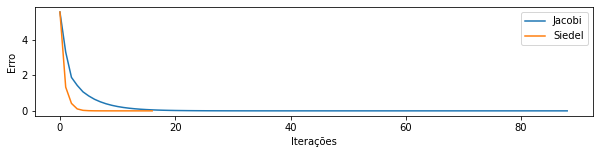

Com base no gráfico é possível observar que a solução Gauss-Siedel chegou mais rapidamente a resposta final
Foi necessario 72 iterações a mais com o método Gauss-Jacobi para atingir o mesmo valor


In [100]:
# 2c)

A = np.array([[4, -2, 1, 0, 0, 0],
            [-2, 7, -2, 1, 0, 0],
            [1, -2, 7, -2, 1, 0],
            [0, 1, -2, 7, -2, 1],
            [0, 0, 1, -2, 7, -2],
            [0, 0, 0, 1, -2, 4]])
b = np.array([-1, -2, 1, 1, -2, -1])

# Gauss-Jacobi
def gauss_jacobi(A,b,x0,tol,flag):
    n = np.shape(A)[0];
    D = np.diag(np.diag(A));
    aux_C = np.linalg.solve(D,A);
    C = np.eye(n) - aux_C;
    g = np.linalg.solve(D,b);
    kmax = 10000; k = 0;

    error = np.zeros(kmax);
    if flag:
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
    else:
        statment = (k<kmax);

    while statment:
        error[k] = np.linalg.norm(b-A.dot(x0));
        k = k+1;
        x0 = C.dot(x0)+g;
        if flag:
            statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
        else:
            statment = (k<kmax);
    
    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

# Gauss-Seidel
def gauss_seidel(A,b,x0,tol,flag):
    L = np.tril(A); R = np.triu(A,1);
    C = -np.linalg.solve(L,R);
    g = np.linalg.solve(L,b);
    kmax = 10000; k = 0;

    error = np.zeros(kmax); 

    if flag: 
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
    else:
        statment = (k<kmax);
        
    while statment:
        error[k] = np.linalg.norm(b-A.dot(x0));
        k = k+1;
        x0 = C.dot(x0)+g;
        if flag:
            statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
        else:
            statment = (k<kmax);

    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

A = np.array([[4, -2, 1, 0, 0, 0],
            [-2, 7, -2, 1, 0, 0],
            [1, -2, 7, -2, 1, 0],
            [0, 1, -2, 7, -2, 1],
            [0, 0, 1, -2, 7, -2],
            [0, 0, 0, 1, -2, 4]])
b = np.array([-1, -2, 1, 1, -2, -1])

# Métodos Iterativos
n = np.shape(A)[0];
x0 = np.zeros(n); 
tol = 0.000000001;
x0[0] = 1

print('Solução Gauss-Jacobi:')
(x_jacobi,k_jacobi,erro_jacobi) = gauss_jacobi(A,b,x0,tol,1);
print(x_jacobi);
print('%d iterações usadas' %(k_jacobi))

print('\nSolução Gauss-Siedel:')
(x_siedel,k_siedel,erro_siedel) = gauss_seidel(A,b,x0,tol,1);
print(x_siedel);
print('%d iterações usadas' %(k_siedel))

print()

plt.figure(figsize=(10,2))
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.plot(np.arange(0, k_jacobi), erro_jacobi[0:k_jacobi], label="Jacobi")
plt.plot(np.arange(0, k_siedel), erro_siedel[0:k_siedel], label="Siedel")
plt.legend(loc="upper right")
plt.show()

print("Com base no gráfico é possível observar que a solução Gauss-Siedel chegou mais rapidamente a resposta final")
print("Foi necessario 72 iterações a mais com o método Gauss-Jacobi para atingir o mesmo valor")

**3a)** O Método de Francis, Potência e Potência Inversa são utilizados para calcular autovalores e autovetores.  
O Método de Francis calcula todos os autovetores e autovalores de uma matriz A simétrica. Para atingir o objetivo, o Método de Francis utiliza da Decomposição QR.    
O Método da Potência calcula o autovalor dominante e seu autovetor associado para uma matriz A diagonizavel. Para atingir o objetivo, utiliza o Quociente de Rayleigh.  
O Método da Potência Inversa calcula o menor autovalor em módulo e seu autovetor associado para uma matriz A invertível. Para atingir o objetivo, utiliza Decomposição LU e algoritmos de substituições.


In [135]:
# 3b)

A = np.array([[11, 2, 3, 1, 4],
              [2, 9, 3, 5, 2],
              [3, 3, 15, 4, 3],
              [1, 5, 4, 12, 4],
              [4, 2, 3, 4, 17]], dtype=np.double)

print("\nCalculando autovalores e autovetores com a biblioteca linalg.eig: ")
(D_python,V_python) = np.linalg.eig(A);
print(D_python)
print(V_python)

# QR modificado
def mgsQR(A):
    (m,n) = np.shape(A);
    V = np.copy(A); 
    Q = np.zeros((m,n), dtype=np.double);
    R = np.zeros((n,n), dtype=np.double);

    for j in np.arange(n):
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(V[:,j]); 
            V[:,j] = V[:,j] - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V[:,j]);
        Q[:,j] = V[:,j]/R[j,j];

    return Q,R

# Francis
def francis(A,tol):
    qr = mgsQR;
    n = np.shape(A)[0];
    A_local = np.copy(A);
    V = np.eye(n, dtype=np.double);
    erro = np.inf
    while erro > tol:
        [Q,R] = qr(A_local);
        A_local = R.dot(Q);
        V = V.dot(Q);
        erro = np.max(np.max(np.abs(np.tril(A_local,-1))));    
    D = np.diag(A_local);
    return D,V

print('\nCalculando autovalores com método de Francis')

tol = 0.000001
(D,V) = francis(A,tol)

print(D);
print(V);

# Potência
def potencia(A,tol):
    k = 0; kmax = 10000; erro = np.inf;
    n = np.shape(A)[0]; y0 = np.zeros(n); y0[0] = 1;

    while(erro > tol and k < kmax):
        x = A.dot(y0);
        y = x/np.linalg.norm(x);
        erro = np.abs(np.abs(y0.dot(y))-1);
        y0 = y; k = k+1;
    
    lambda_ = y.dot(A.dot(y));
    return lambda_, y, k

#Potência Inversa
def potencia_inv(A,tol):
    k = 0; kmax = 10000; erro = np.inf;
    n = np.shape(A)[0]; y0 = np.zeros(n); y0[0] = 1;

    while(erro > tol and k < kmax):
        x = np.linalg.solve(A,y0);
        y = x/np.linalg.norm(x);
        erro = np.abs(np.abs(y0.dot(y))-1);
        y0 = y; k = k+1;

    lambda_ = y.dot(A.dot(y));
    return lambda_, y, k

print('\nCálculo do maior autovalor em módulo de A')
(lambda_,y,k) = potencia(A,0.000001)
print('Potência: %.4f usando %d iterações' %(lambda_,k))
print('Linalg.eig: %.4f' %(np.max(abs(D_python))))

print('\nCálculo do menor autovalor em módulo de A')
(lambda_inv,y,k) = potencia_inv(A,0.000001)
print('Potência Inversa: %.4f usando %d iterações' %(lambda_inv,k))
print('Linalg.eig: %.4f\n' %(np.min(abs(D_python))))

print("Os valores calculados por Francis, Potência e Potência Inversa são próximos dos valores calculados pela biblioteca linalg.eig")


Calculando autovalores e autovetores com a biblioteca linalg.eig: 
[26.02517458  4.87394638  8.66356791 10.93677451 13.50053662]
[[ 0.32743522  0.26726603 -0.72910002 -0.50579164  0.18423634]
 [ 0.32598403 -0.74142854 -0.41391448  0.31882387 -0.26654133]
 [ 0.49833057 -0.05017271  0.4298639  -0.52077788 -0.54143954]
 [ 0.4474816   0.59491453 -0.06955611  0.60290543 -0.27839523]
 [ 0.58133247 -0.14970633  0.32782151  0.08843985  0.72412155]]

Calculando autovalores com método de Francis
[26.02517458 13.50053662 10.93677451  8.66356791  4.87394638]
[[ 0.32743522 -0.18423653  0.50579155 -0.72910004 -0.26726603]
 [ 0.32598403  0.26654145 -0.31882378 -0.41391447  0.74142854]
 [ 0.49833057  0.54143934  0.5207781   0.42986388  0.05017271]
 [ 0.4474816   0.27839546 -0.60290532 -0.06955609 -0.59491453]
 [ 0.58133247 -0.72412152 -0.08844012  0.32782152  0.14970633]]

Cálculo do maior autovalor em módulo de A
Potência: 26.0252 usando 10 iterações
Linalg.eig: 26.0252

Cálculo do menor autovalor e

**4** - Compressão de Imagens
Dada uma matriz A que representa uma imagem, a compressão dela é realizada utilizando a Decomposição SVD.  
A Decomposição SVD retorna 3 matrizes: U, S e V onde A = U * S * V^T. Com os 3 vetores, a Compressão de Imagem consiste em, dado um k fornecido, pegar apenas partes de cada matriz.
- U no intervalo MxK
- S no intervalo KxK
- V^T no intervalo KxN
Por fim, para obter a imagem final, basta multiplicar, ou seja, Ak = U * S * V

In [155]:
# 4

def compressao_de_imagem(A, k = 120, tol = 0.00000001): 
    m, n = A.shape

    # Calculando a diagonal
    U, S, V = lin.svd(A) 
    # Transformando em matriz diagonal
    S = np.diag(S)
    
    # U no intervalo MxK
    U_compressed = U[0:m-1,0:k-1]
    # S no intervalo KxK
    S_compressed = S[0:k-1,0:k-1]
    # V no intervalo KxN
    V_compressed = V[0:k-1,0:n]
    
    # Criando imagem comprimida
    Ak = np.dot(S_compressed, V_compressed) 
    Ak = np.dot(U_compressed, Ak)
    
    return Ak
    
# É necessario adicionar uma imagem para executar com nome "imagem.jpg"

A = imageio.imread("imagem.jpg")
Ak = compressao_de_imagem(A)

Ak = Ak.astype(np.uint8)
    
plt.figure(figsize=(12,12)) 
plt.subplot(121) 
plt.imshow(A, cmap="gray")
plt.axis('off') 
plt.subplot(122)
plt.imshow(Ak, cmap="gray")
plt.axis('off')

A = imageio.imwrite("imagem_compressao.jpg", Ak)

FileNotFoundError: ignored